In [11]:
using WAV
using Plots
new_sig, sample_rate = wavread("../signal_generator/50Hz_0deg.wav");

In [34]:
using Statistics: mean, std
function normalize_signal(signal)
    mean_sig = mean(signal);
    std_sig = std(signal);

    return (signal .- mean_sig) ./ std_sig;
end

processed_sig = [];
for signal in eachcol(new_sig)
    processed = normalize_signal(signal);
    push!(processed_sig, processed);
end

processed_sig = transpose(mapreduce(permutedims, vcat, processed_sig))

136869×8 transpose(::Matrix{Float64}) with eltype Float64:
 -1.51466   -1.21906   -0.916422  …  -1.03032   -1.46669   -0.187014
 -1.57907   -1.26804   -0.921541     -1.07796   -1.41261   -0.217879
 -1.69619   -1.24787   -0.988087     -1.18911   -1.47139   -0.26109
 -1.69619   -1.33144   -1.07255      -1.17323   -1.56073   -0.217879
 -1.62592   -1.42365   -1.11094      -1.08854   -1.58424   -0.205533
 -1.59078   -1.45247   -1.12374   …  -1.18911   -1.68063   -0.452451
 -1.59664   -1.52163   -1.11094      -1.15206   -1.63596   -0.224052
 -1.63177   -1.52163   -1.15701      -1.15206   -1.5043    -0.143804
 -1.64348   -1.53316   -1.20309      -1.15735   -1.50665   -0.248744
 -1.6142    -1.54469   -1.20564      -1.11501   -1.47609   -0.224052
  ⋮                               ⋱   ⋮                    
 -0.384482  -0.285391  -0.250953  …  -0.786841  -0.154802  -0.643811
 -0.349347  -0.268101  -0.320059     -0.797427  -0.19477   -0.680849
 -0.40205   -0.308445  -0.26887      -0.845064  -0.178

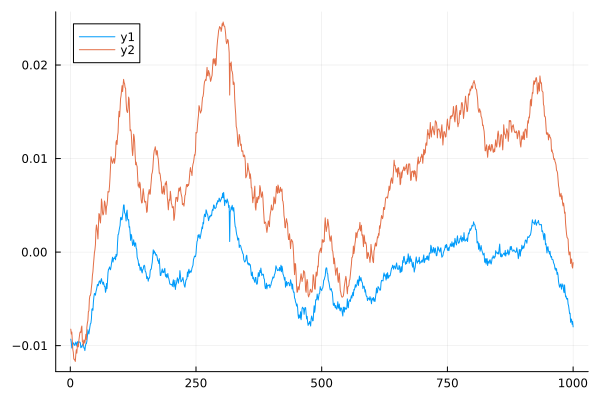

In [12]:
plot(new_sig[1:1000, 1])
plot!(new_sig[1:1000, 2])

In [13]:
using Statistics: std
std(new_sig[1:1000,1])

0.003364851032499995

In [14]:
std(new_sig[1:1000,2])

0.007395279411272082

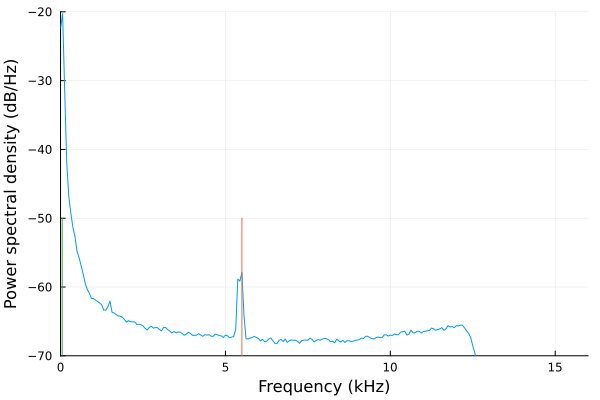

In [37]:
using SignalAnalysis: psd
psd(processed_sig[:, 1]; fs=sample_rate)
plot!([5.5, 5.5], [-70, -50])
plot!([0.050, 0.050], [-70, -50])
xlims!((0, 16))

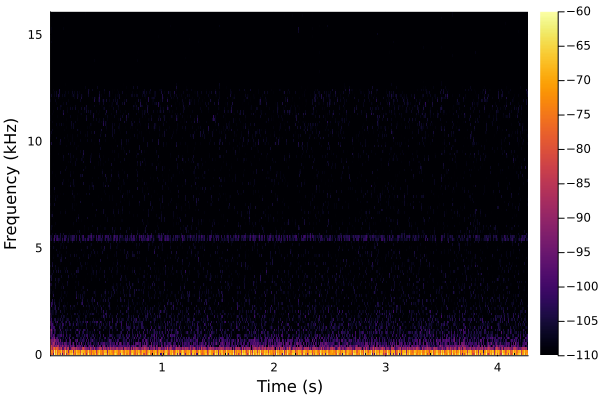

In [17]:
using SignalAnalysis: specgram
specgram(new_sig[:, 1]; fs=sample_rate)